In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [2]:
engine = create_engine('postgresql://postgres:<password>@localhost:5432/sql_homework')
connection = engine.connect()

The above engine works, if runned it might give an error, the reason being that I took out my pgadmin password. 

In [3]:
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
salaries_df.head(10)

emp_no  salary   from_date     to_date
0   10001   60117  1986-06-26  1987-06-26
1   10002   65828  1996-08-03  1997-08-03
2   10003   40006  1995-12-03  1996-12-02
3   10004   40054  1986-12-01  1987-12-01
4   10005   78228  1989-09-12  1990-09-12
5   10006   40000  1990-08-05  1991-08-05
6   10007   56724  1989-02-10  1990-02-10
7   10008   46671  1998-03-11  1999-03-11
8   10009   60929  1985-02-18  1986-02-18
9   10010   72488  1996-11-24  1997-11-24

In [4]:
titles_df = pd.read_sql("SELECT * FROM titles", connection)
titles_df.head(10)

emp_no            title   from_date     to_date
0   10001  Senior Engineer  1986-06-26  9999-01-01
1   10002            Staff  1996-08-03  9999-01-01
2   10003  Senior Engineer  1995-12-03  9999-01-01
3   10004         Engineer  1986-12-01  1995-12-01
4   10004  Senior Engineer  1995-12-01  9999-01-01
5   10005     Senior Staff  1996-09-12  9999-01-01
6   10005            Staff  1989-09-12  1996-09-12
7   10006  Senior Engineer  1990-08-05  9999-01-01
8   10007     Senior Staff  1996-02-11  9999-01-01
9   10007            Staff  1989-02-10  1996-02-11

In [5]:
merged_df = pd.merge(salaries_df[["emp_no", "salary"]], titles_df, how = "left", on = "emp_no")
merged_df_updated = merged_df[["title", "salary"]]
merged_df_final_version = merged_df_updated.groupby("title").mean()

In [6]:
merged_df_average_salary = merged_df_updated.groupby("title").mean()
merged_df_average_salary

salary
title                           
Assistant Engineer  48493.204786
Engineer            48539.781423
Manager             51531.041667
Senior Engineer     48506.751806
Senior Staff        58503.286614
Staff               58465.271904
Technique Leader    48580.505772

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


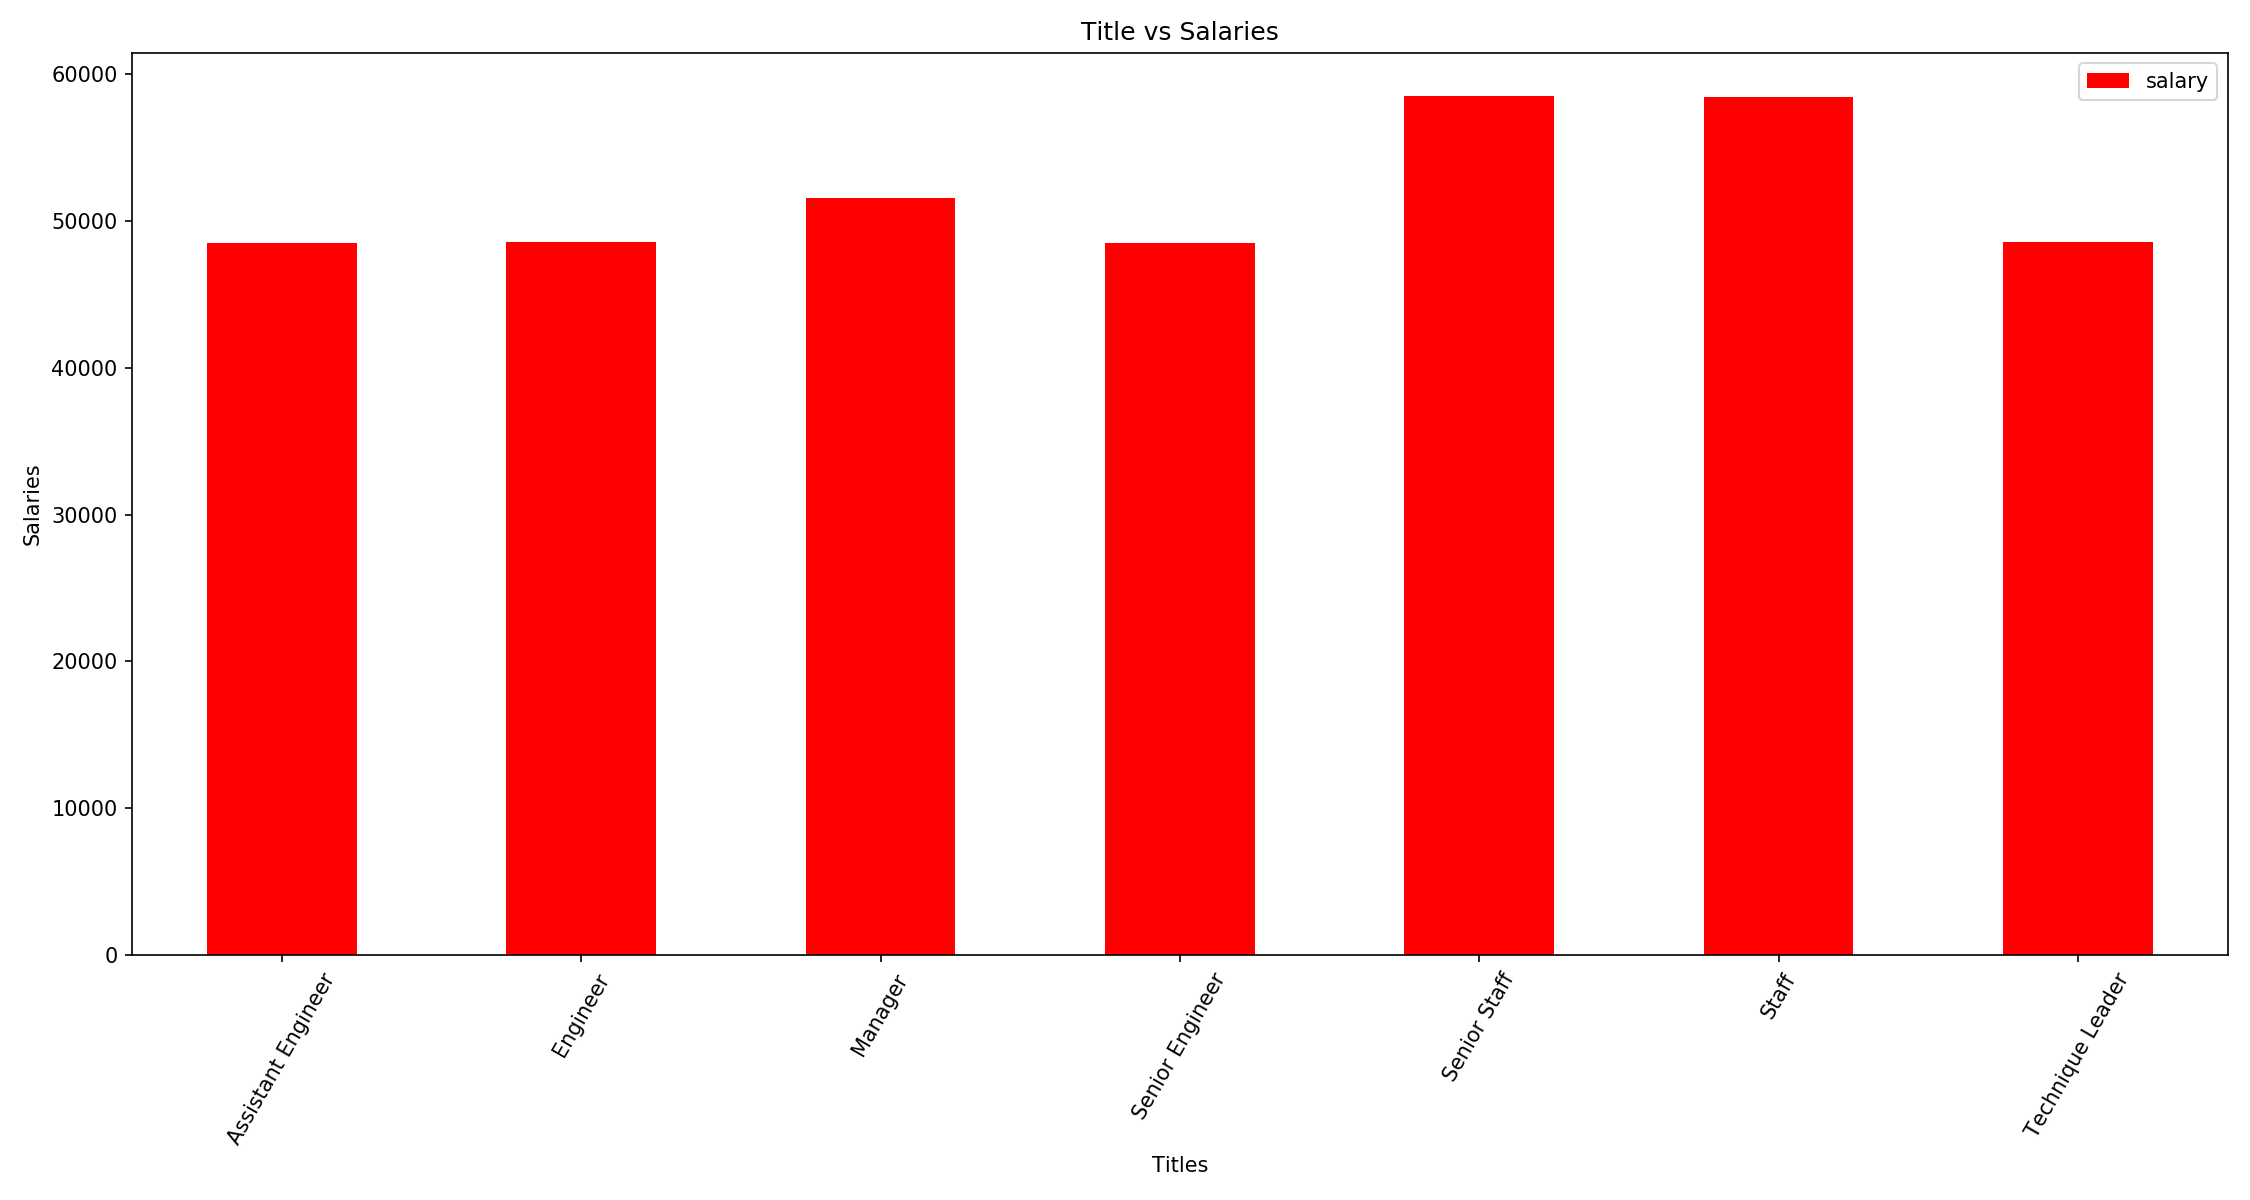

In [18]:
merged_df_average_salary.plot.bar(figsize=(15,8), color = 'red')

plt.title("Title vs Salaries")
plt.xlabel("Titles")
plt.ylabel("Salaries")
plt.xticks(ticks = None, labels = None, rotation=60)


plt.savefig("../AverageSalary.png")
plt.tight_layout()
plt.show()

Average Salary Analysis: 

As seen on the graph, by finding the average of the salaries compared to their title, the salaries range from approximately 48000 to close to 60000. 
